# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [31]:
%pip install matplotlib pandas numpy seaborn wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/151.4 kB 393.8 kB/s eta 0:00:01
   --------------------- ----------------- 81.9/151.4 kB 573.4 kB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 905.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\phinv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
raw_df = pd.read_csv('Data/nintendo.csv')


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        10 non-null     int64  
 1   text                           9 non-null      object 
 2   post_text                      9 non-null      object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           10 non-null     object 
 6   timestamp                      10 non-null     int64  
 7   image                          1 non-null      object 
 8   image_lowquality               10 non-null     object 
 9   images                         10 non-null     object 
 10  images_description             10 non-null     object 
 11  images_lowquality              10 non-null     object 
 12  images_lowquality_description  10 non-null     object

In [23]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [24]:
reactions

{'thích': 245,
 'yêu thích': 84,
 'haha': 1,
 'wow': 10,
 'thương thương': 9,
 'phẫn nộ': 1,
 'shares': 32,
 'comments': 36}

## Reactions analysis

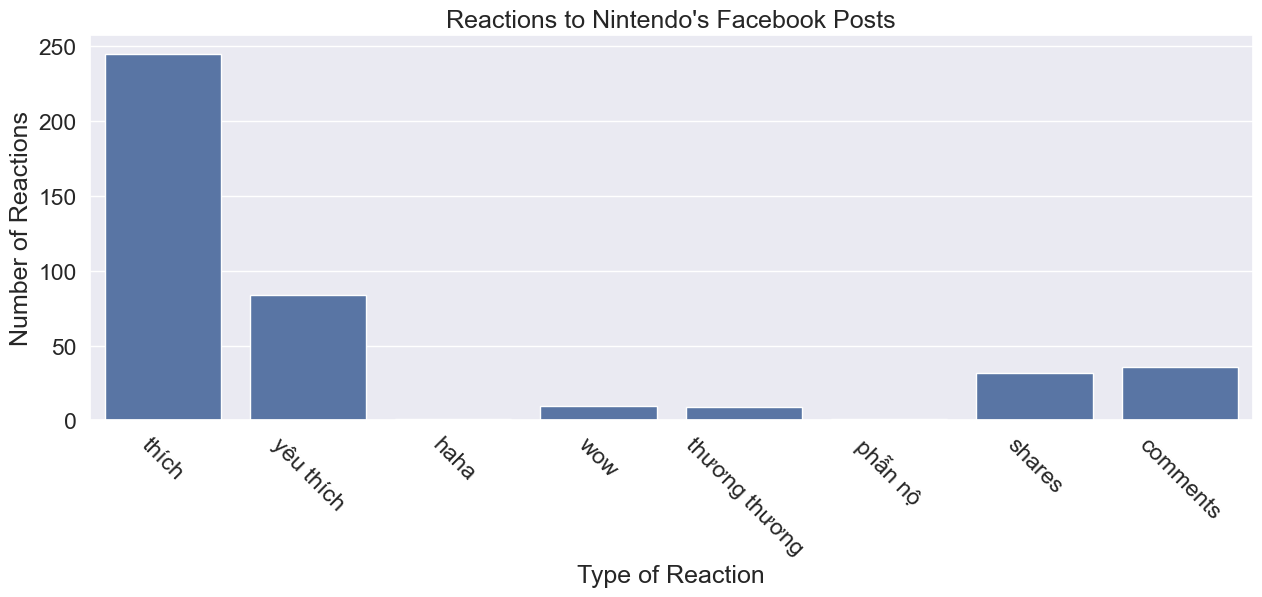

In [28]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Nintendo's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

## Read all posts

In [29]:
df_text = post_df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,714936233995315,Preorders for our Metroid Prime™ - Samus Varia...
1,711694474319491,NaN
2,711689057653366,Time to jump into the wonder that awaits!\n\n#...
3,711342361021369,Come along as the Ninja Kidz explore our Ninte...
4,710538707768401,Jump into the unexpected and experience a new ...
5,710044124484526,Enter for a chance to win a trip for four to U...
6,707570124731926,Super Mario Bros. Wonder – All aboard the Inch...
7,706928861462719,Super Mario Bros. Wonder – Do not disturb the ...
8,706302518192020,Say it with flowers! ❤️\n#SuperMarioBrosWonder
9,705797111575894,Meet Elephant Mario! #SuperMarioBrosWonder


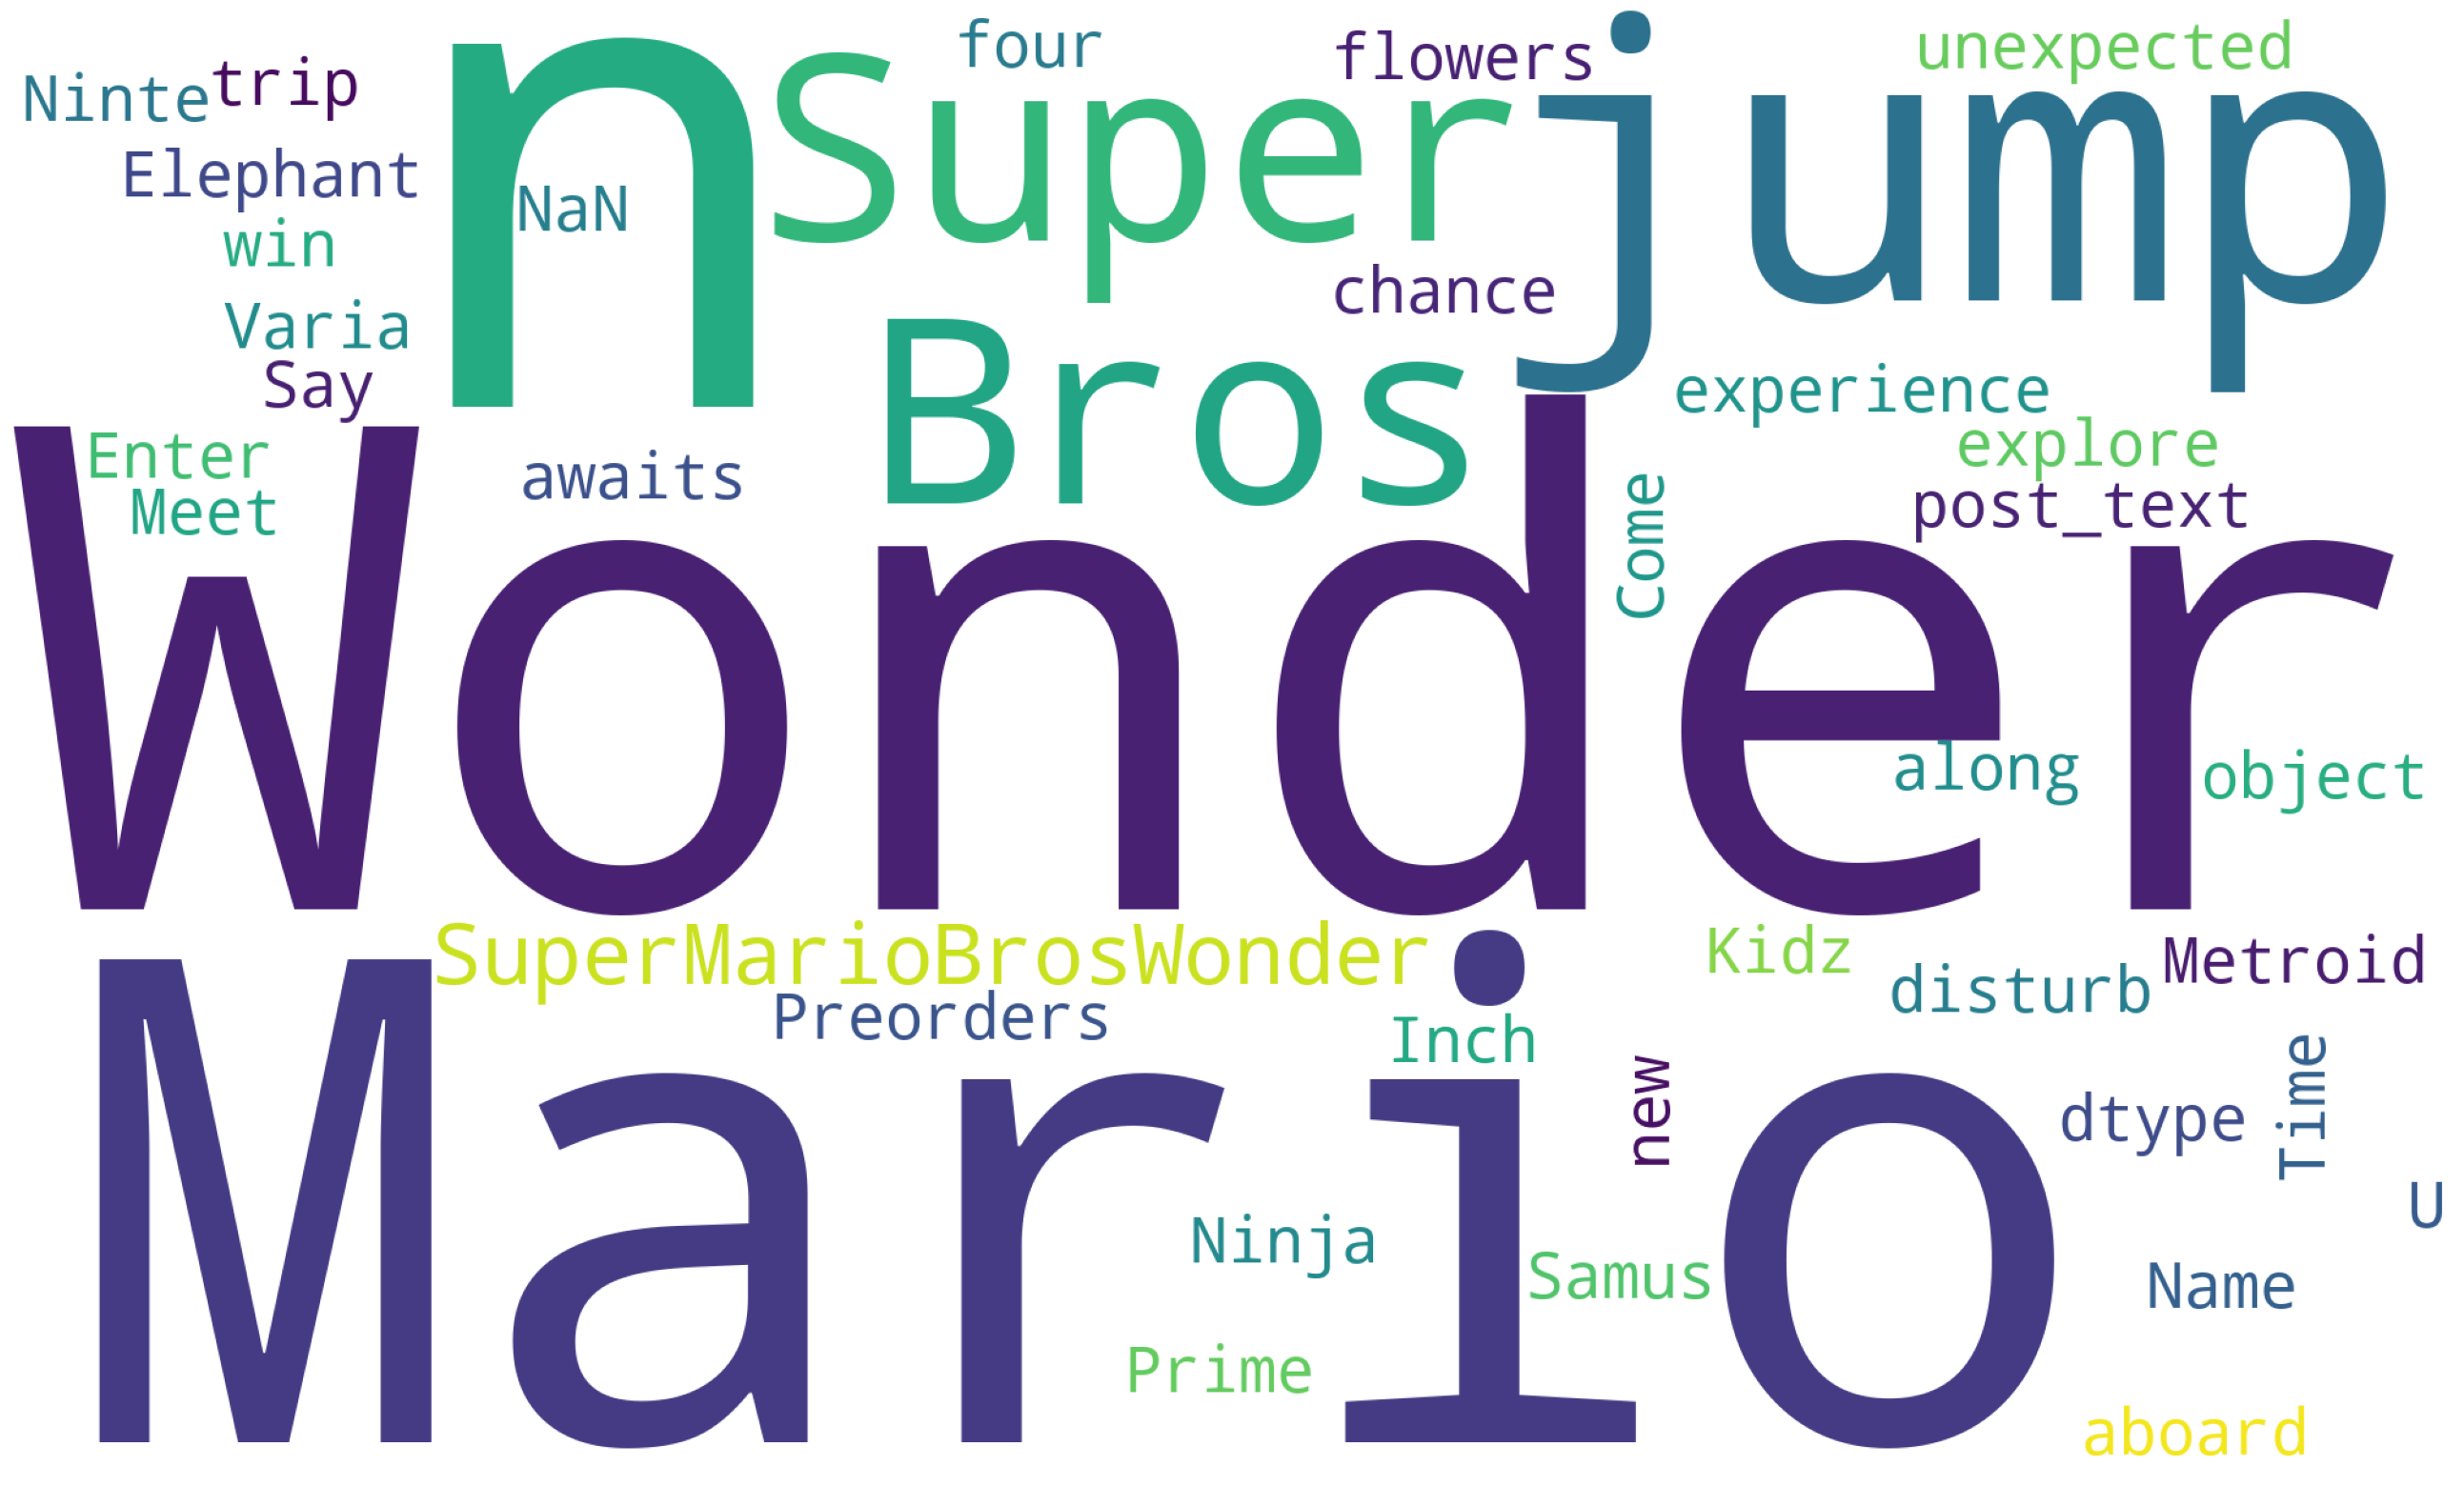

In [32]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()